# 맨체스터유나이티드에 필요한 선수 찾기

### 2018, 2019 FIFA 데이터를 통해 맨체스터유나이티드팀을 분석하고 이 팀에 필요한 선수 찾기

# 데이터 수집

In [1]:
# 데이터 불러오기

import pandas as pd

data = pd.read_csv('./FIFA_data.csv')
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94.0,94.0,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94.0,94.0,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92.0,93.0,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91.0,93.0,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91.0,92.0,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [2]:
# 80개의 칼럼 모두 보이게 칼럼의 최대 개수 증가

pd.set_option('display.max_columns', 80)
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94.0,94.0,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94.0,94.0,Juventus,€77M,€405K,Right,5.0,4.0,5.0,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92.0,93.0,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91.0,93.0,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91.0,92.0,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


칼럼명 | 칼럼 의미
-|-
ID|고유의 번호
Name|이름
Age|나이
Overall|현재 능력치
Potential|잠재 능력치
Club|소속 팀
Value|예상 이적료(유로)
Wage|주급(유로)
Preferred Foot|잘 사용하는 발
Weak Foot|잘 사용하지 않는 발
Skill Moves|개인기
Position|포지션
Jersey Number|등번호
Joined|소속 팀 입단 날짜
Contract Valid Until|계약 기간
Height|키(피트)
Weight|몸무게(파운드)
LS ~ RB|포지션 별 능력치
Crossing ~ GKReflexes|세부 능력치
Release Clause|바이아웃

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 80 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  float64
 5   Potential                 18207 non-null  float64
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Position                  18147 non-null  object 
 14  Jersey

#### 분석 계획

1. 맨체스터유나이티드의 선수 분석
2. 맨체스터유나이티드의 지역 라이벌 맨체스터시티 선수와 능력치 비교
3. 부족한 포지션 2개 선택
4. 다른 팀의 선수 중 맨체스터유나이티드의 재정, 현실가능성, 영입방침을 고려하여 영입할 2명의 선수 선택

# 1. 맨체스터유나이티드의 선수 분석

## EDA

In [4]:
data['Club'].unique()

array(['FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid',
       'Atlético Madrid', 'FC Bayern München', 'Tottenham Hotspur',
       'Liverpool', 'Napoli', 'Arsenal', 'Milan', 'Inter', 'Lazio',
       'Borussia Dortmund', 'Vissel Kobe', 'Olympique Lyonnais', 'Roma',
       'Valencia CF', 'Guangzhou Evergrande Taobao FC', 'FC Porto',
       'FC Schalke 04', 'Beşiktaş JK', 'LA Galaxy', 'Sporting CP',
       'Real Betis', 'Olympique de Marseille', 'RC Celta',
       'Bayer 04 Leverkusen', 'Real Sociedad', 'Villarreal CF',
       'Sevilla FC', 'SL Benfica', 'AS Saint-Étienne', 'AS Monaco',
       'Leicester City', 'Atalanta', 'Grêmio', 'Atlético Mineiro',
       'RB Leipzig', 'Ajax', 'Dalian YiFang FC', 'Everton',
       'West Ham United', '1. FC Köln', 'TSG 1899 Hoffenheim',
       'Shanghai SIPG FC', 'OGC Nice', 'Al Nassr',
       'Wolverhampton Wanderers', 'Borussia Mönchengladbach',
       'Hertha BSC', 'SV Werder

In [5]:
# 맨체스터유나이티드의 선수들만 추출

mu = data[data['Club'] == 'Manchester United']

In [6]:
# 맨체스터유나이티드의 선수만 추출되었는지 확인

mu['Club'].unique()

array(['Manchester United'], dtype=object)

In [7]:
print(f'인원 : {mu.shape[0]}')
print(f'맨유 선수들의 포지션 : {mu["Position"].unique()}')
print(f'평균 능력치 : {mu["Overall"].mean()}')
print(f'평균 잠재 능력치 : {mu["Potential"].mean()}')

인원 : 33
맨유 선수들의 포지션 : ['GK' 'RDM' 'ST' 'RW' 'LW' 'CDM' 'RM' 'CM' 'CAM' 'CB' 'RCB' 'LB' 'RB']
평균 능력치 : 80.18181818181819
평균 잠재 능력치 : 82.81818181818181


In [8]:
import seaborn as sns

C:\Users\psuny\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='count'>

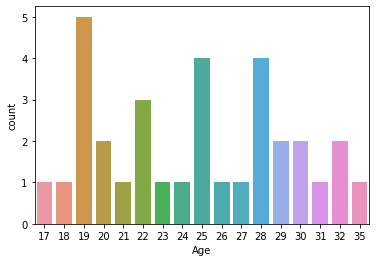

In [9]:
# 맨체스터유나이티드의 나이대 구성 확인

sns.countplot(mu['Age'])

C:\Users\psuny\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Position', ylabel='count'>

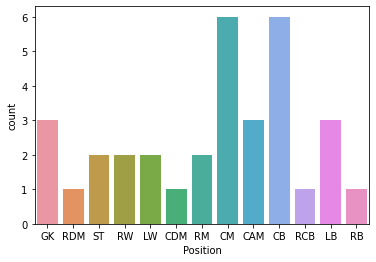

In [10]:
# 포지션 구성 확인

sns.countplot(mu['Position'])

<AxesSubplot:xlabel='Position', ylabel='Overall'>

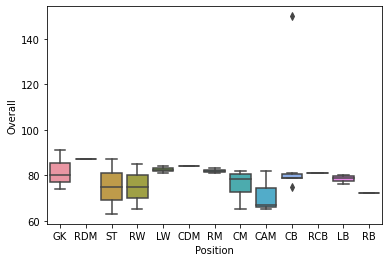

In [11]:
# 이상치 확인

sns.boxplot(data = mu, x = 'Position', y = 'Overall')     # 포지션별 현재 능력치에 대한 box plot

- 포지션 CB에 이상치 2개 발견됨
- 포지션 CB 아래에 있는 이상치는 위에 있는 이상치의 영향으로 이상치처럼 보이는 것일 수도 있음

## 이상치 처리

In [12]:
# 아싱치 데이터 확인

mu[mu['Overall'] > 100]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
11422,237160,R. Williams,19,England,150.0,79.0,Manchester United,€875K,€8K,Right,1.0,3.0,2.0,CB,52.0,"Jan 1, 2016",2019,6'0,165lbs,46+2,46+2,46+2,47+2,46+2,46+2,46+2,47+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2,55+2,57+2,57+2,57+2,55+2,57+2,62+2,62+2,62+2,57+2,32.0,27.0,63.0,58.0,37.0,51.0,35.0,36.0,55.0,50.0,72.0,74.0,58.0,52.0,59.0,43.0,65.0,41.0,68.0,30.0,66.0,56.0,29.0,43.0,49.0,51.0,63.0,68.0,66.0,7.0,5.0,6.0,6.0,9.0,€2.2M


- 나이가 19살임에도 Overall이 150이므로 같은 포지션의 다른 선수는 어떤지 확인

In [13]:
mu[mu['Position'] == 'CB'][['Overall', 'CB']]

,Overall,CB
327,81.0,80+2
584,79.0,77+2
629,79.0,78+3
654,79.0,78+2
11081,75.0,62+2
11422,150.0,62+2


- 같은 포지션의 다른 선수들은 CB의 점수가 비슷하면 Overall이 같음을 알 수 있음
- 따라서 이상치의 Overall을 75로 수정

In [14]:
mu['Overall'][11422] = 75

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Position', ylabel='Overall'>

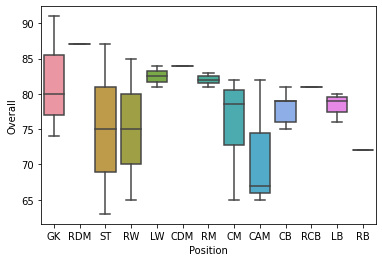

In [15]:
# 다시 이상치 존재 확인

sns.boxplot(data = mu, x = 'Position', y = 'Overall')

<AxesSubplot:xlabel='Position', ylabel='Potential'>

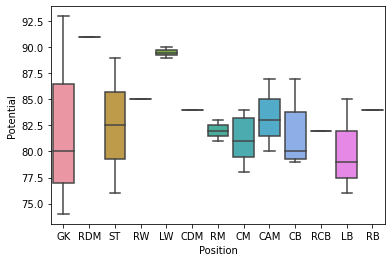

In [16]:
# 포지션별 잠재 능력치의 이상치 확인

sns.boxplot(data = mu, x = 'Position', y = 'Potential')

- 이상치 없음

## 결측치 찾기

In [17]:
mu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 3 to 12545
Data columns (total 80 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        33 non-null     int64  
 1   Name                      33 non-null     object 
 2   Age                       33 non-null     int64  
 3   Nationality               33 non-null     object 
 4   Overall                   33 non-null     float64
 5   Potential                 33 non-null     float64
 6   Club                      33 non-null     object 
 7   Value                     33 non-null     object 
 8   Wage                      33 non-null     object 
 9   Preferred Foot            33 non-null     object 
 10  International Reputation  33 non-null     float64
 11  Weak Foot                 33 non-null     float64
 12  Skill Moves               33 non-null     float64
 13  Position                  33 non-null     object 
 14  Jersey Nu

- LS ~ RB까지 결측치 존재

In [18]:
# 결측치 확인

mu[mu.isnull()['LS']]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91.0,93.0,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
526,173373,S. Romero,31,Argentina,80.0,80.0,Manchester United,€9M,€91K,Right,3.0,3.0,1.0,GK,1.0,"Jul 27, 2015",2021,6'4,192lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,14.0,12.0,39.0,17.0,12.0,12.0,13.0,48.0,40.0,47.0,44.0,52.0,78.0,44.0,14.0,63.0,35.0,75.0,11.0,33.0,21.0,11.0,55.0,16.0,62.0,14.0,11.0,15.0,78.0,76.0,81.0,77.0,82.0,€16.7M
2561,53739,L. Grant,35,England,74.0,74.0,Manchester United,€1.3M,€39K,Right,1.0,4.0,1.0,GK,13.0,"Jul 3, 2018",2020,6'4,183lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,17.0,14.0,43.0,15.0,11.0,17.0,19.0,40.0,34.0,52.0,46.0,56.0,69.0,56.0,24.0,73.0,39.0,71.0,19.0,42.0,26.0,14.0,50.0,20.0,60.0,12.0,13.0,19.0,74.0,72.0,74.0,74.0,76.0,€2.5M


- 포지션이 GK인 선수는 LS~RB까지의 값이 비어있음
- 이는 다른 포지션에 대한 능력치를 부여할 필요가 없기 때문에 NaN으로 채워진 것으로 보임
- 따라서 NaN값을 측정할 수 없다는 의미로 -1로 대체

In [19]:
mu = mu.fillna(-1)

In [20]:
# 결측치 처리 확인

mu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 3 to 12545
Data columns (total 80 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        33 non-null     int64  
 1   Name                      33 non-null     object 
 2   Age                       33 non-null     int64  
 3   Nationality               33 non-null     object 
 4   Overall                   33 non-null     float64
 5   Potential                 33 non-null     float64
 6   Club                      33 non-null     object 
 7   Value                     33 non-null     object 
 8   Wage                      33 non-null     object 
 9   Preferred Foot            33 non-null     object 
 10  International Reputation  33 non-null     float64
 11  Weak Foot                 33 non-null     float64
 12  Skill Moves               33 non-null     float64
 13  Position                  33 non-null     object 
 14  Jersey Nu

# 2. 맨체스터유나이티드의 지역 라이벌 맨체스터시티 선수와 능력치 비교

## 전처리

In [21]:
# 맨체스터시티 선수와 비교하기 위해 mu, mc 선수가 담긴 데이터 만듦

df = data[(data['Club'] == 'Manchester United') | (data['Club'] == 'Manchester City')]

In [22]:
df['Club'].unique()

array(['Manchester United', 'Manchester City'], dtype=object)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 3 to 17451
Data columns (total 80 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        66 non-null     int64  
 1   Name                      66 non-null     object 
 2   Age                       66 non-null     int64  
 3   Nationality               66 non-null     object 
 4   Overall                   66 non-null     float64
 5   Potential                 66 non-null     float64
 6   Club                      66 non-null     object 
 7   Value                     66 non-null     object 
 8   Wage                      66 non-null     object 
 9   Preferred Foot            66 non-null     object 
 10  International Reputation  66 non-null     float64
 11  Weak Foot                 66 non-null     float64
 12  Skill Moves               66 non-null     float64
 13  Position                  66 non-null     object 
 14  Jersey Nu

In [24]:
df['Value']

3          €72M
4         €102M
13         €60M
23       €64.5M
45         €64M
          ...  
14197     €525K
14511     €450K
15210     €400K
16403     €210K
17451     €120K
Name: Value, Length: 66, dtype: object

- Value의 타입이 object로 되어 있음
- 유로로 되어 있으므로 한화로 수정
- 1유로 = 1,358원이라고 가정
- 1M = 1,000,000
- 1K = 1,000

In [25]:
import warnings

warnings.filterwarnings(action = 'ignore')     # 경고표시 제거

In [26]:
# Value에 있는 M, K와 유로표시, 소숫점 자리표시를 다른 걸로 대체하거나 제거 후 int형으로 변경

df['Value'] = df['Value'].str.replace('M', '000000')
df['Value'] = df['Value'].str.replace('K', '000')
df['Value'] = df['Value'].str.slice(1,)
df['Value'] = df['Value'].str.replace('.', '')
df['Value'] = df['Value'].astype(int)

In [27]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91.0,93.0,Manchester United,72000000,€260K,Right,4.0,3.0,1.0,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91.0,92.0,Manchester City,102000000,€355K,Right,4.0,5.0,4.0,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
13,168542,David Silva,32,Spain,90.0,90.0,Manchester City,60000000,€285K,Left,4.0,2.0,4.0,LCM,21.0,"Jul 14, 2010",2020,5'8,148lbs,77+3,77+3,77+3,85+3,84+3,84+3,84+3,85+3,87+3,87+3,87+3,85+3,85+3,85+3,85+3,85+3,69+3,70+3,70+3,70+3,69+3,64+3,57+3,57+3,57+3,64+3,84.0,76.0,54.0,93.0,82.0,89.0,82.0,77.0,87.0,94.0,70.0,64.0,92.0,90.0,90.0,72.0,64.0,78.0,52.0,75.0,57.0,50.0,89.0,92.0,75.0,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,€111M
23,153079,S. Agüero,30,Argentina,89.0,89.0,Manchester City,645000000,€300K,Right,4.0,4.0,4.0,ST,10.0,"Jul 28, 2011",2021,5'8,154lbs,86+3,86+3,86+3,86+3,87+3,87+3,87+3,86+3,85+3,85+3,85+3,83+3,76+3,76+3,76+3,83+3,58+3,56+3,56+3,56+3,58+3,53+3,47+3,47+3,47+3,53+3,70.0,93.0,77.0,81.0,85.0,89.0,82.0,73.0,64.0,89.0,88.0,80.0,86.0,90.0,91.0,88.0,81.0,76.0,73.0,83.0,65.0,24.0,92.0,83.0,83.0,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,€119.3M
45,195864,P. Pogba,25,France,87.0,91.0,Manchester United,64000000,€210K,Right,4.0,4.0,5.0,RDM,6.0,"Aug 9, 2016",2021,6'4,185lbs,81+3,81+3,81+3,82+3,82+3,82+3,82+3,82+3,83+3,83+3,83+3,83+3,84+3,84+3,84+3,83+3,77+3,78+3,78+3,78+3,77+3,75+3,74+3,74+3,74+3,75+3,80.0,73.0,73.0,86.0,85.0,87.0,84.0,82.0,90.0,90.0,71.0,79.0,74.0,81.0,64.0,90.0,83.0,88.0,89.0,81.0,78.0,66.0,81.0,87.0,81.0,87.0,66.0,70.0,68.0,5.0,6.0,2.0,4.0,3.0,€123.2M


In [28]:
# mu선수와 mc선수 분리

mu = df[df['Club'] == 'Manchester United']
mc = df[df['Club'] == 'Manchester City']

## 주전선수 비교를 위해 mu주전과 mc주전 선발

- GK: 1명, CB: 4명, MF: 4명, ST: 2명 선발
- 선발 기준은 현재능력치
- GK리스트 = GK
- CB리스트 = CB, LCB, RCB, RB, LB
- MF리스트 = RCM, LCM, RDM, CDM, CM, RM, CAM
- ST리스트 = ST, LW, RW

In [29]:
# 각 포지션별 리스트 작성

gk_list = ['GK']
cb_list = ['CB', 'LCB', 'RCB', 'RB', 'LB']
mf_list = ['RCM', 'LCM', 'RDM', 'CDM', 'CM', 'RM', 'CAM']
st_list = ['ST', 'LW', 'RW']

In [31]:
# 각 포지션별 남은 자리 숫자 입력_mu

st_count = 2
mf_count = 4
cb_count = 4
gk_count = 1

mu_id = []

for index in mu.index:
    if mu['Position'][index] in gk_list:
        if gk_count != 0:
            mu_id.append(mu['ID'][index])
            gk_count -= 1
    elif mu['Position'][index] in cb_list:
        if cb_count != 0:
            mu_id.append(mu['ID'][index])
            mu['Position'][index] = 'CB'
            cb_count -= 1
    elif mu['Position'][index] in mf_list:
        if mf_count != 0:
            mu_id.append(mu['ID'][index])
            mu['Position'][index] = 'MF'
            mf_count -= 1
    else:
        if st_count != 0:
            mu_id.append(mu['ID'][index])
            mu['Position'][index] = 'ST'
            st_count -= 1

In [32]:
mu = mu[mu['ID'].isin(mu_id)]     # mu_id리스트 안에 있는 선수만 mu선수로 남김

In [33]:
# 각 포지션별 남은 자리 숫자를 입력_mc

st_count = 2
mf_count = 4
cb_count = 4
gk_count = 1

mc_id = []

for index in mc.index:
    if mc['Position'][index] in gk_list:
        if gk_count != 0:
            mc_id.append(mc['ID'][index])
            gk_count -= 1
    elif mc['Position'][index] in cb_list:
        if cb_count != 0:
            mc_id.append(mc['ID'][index])
            mc['Position'][index] = 'CB'
            cb_count -= 1
    elif mc['Position'][index] in mf_list:
        if mf_count != 0:
            mc_id.append(mc['ID'][index])
            mc['Position'][index] = 'MF'
            mf_count -= 1
    else:
        if st_count != 0:
            mc_id.append(mc['ID'][index])
            mc['Position'][index] = 'ST'
            st_count -= 1

In [34]:
mc = mc[mc['ID'].isin(mc_id)]     # mc_id리스트 안에 있는 선수만 mc선수로 남김

In [35]:
df = pd.concat([mu, mc])

## EDA
### mu와 mc의 주전선수 비교

<AxesSubplot:xlabel='Position', ylabel='Overall'>

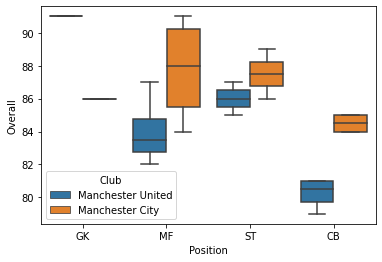

In [36]:
sns.boxplot(data = df, x = 'Position', y = 'Overall', hue = 'Club')

<AxesSubplot:xlabel='Position', ylabel='Value'>

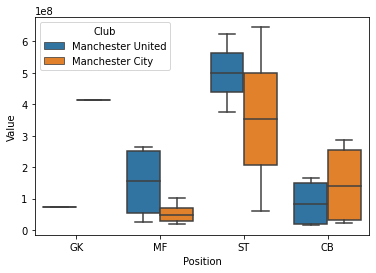

In [37]:
sns.boxplot(data = df, x = 'Position', y = 'Value', hue = 'Club')

# 3. 부족한 포지션 2개 선택

- mu와 mc선수를 비교해보면 이적료 대비 능력치가 떨어지는 포지션은 MF, CB임을 확인할 수 있음

# 4. 다른 팀의 선수 중 맨체스터유나이티드의 재정, 현실가능성, 영입방침을 고려하여 영입할 2명의 선수 선택

## EDA

- 필요 포지션의 어떤 선수를 대체해야 할 지 확인
- 기준은 영입일, 능력치, 잠재력, 나이

### 잔류포인트 = (Overall * 2 + Potential) / Age

In [38]:
mu['Point'] = (mu['Overall'] * 2 + mu['Potential']) / mu['Age']

In [39]:
mu[mu['Position'] == 'MF'][['Name', 'Overall', 'Potential', 'Age', 'Joined', 'Point']]

,Name,Overall,Potential,Age,Joined,Point
45,P. Pogba,87.0,91.0,25,"Aug 9, 2016",10.600000
132,N. Matić,84.0,84.0,29,"Jul 31, 2017",8.689655
211,Juan Mata,83.0,83.0,30,"Jan 25, 2014",8.300000
250,Fred,82.0,84.0,25,"Jun 21, 2018",9.920000


In [40]:
mu[mu['Position'] == 'CB'][['Name', 'Overall', 'Potential', 'Age', 'Joined', 'Point']]

,Name,Overall,Potential,Age,Joined,Point
327,E. Bailly,81.0,87.0,24,"Jul 1, 2016",10.375000
377,C. Smalling,81.0,82.0,28,"Jul 1, 2010",8.714286
454,L. Shaw,80.0,85.0,22,"Jun 27, 2014",11.136364
584,V. Lindelöf,79.0,85.0,23,"Jul 1, 2017",10.565217


- 잔류포인트가 가장 낮은 Juan Mata, C.Smalling 방출 후 MF, CB 한 명씩 영입

In [44]:
data[(data['Name'] == 'Juan Mata')|(data['Name'] == 'C. Smalling')][['Name', 'Position']]

,Name,Position
211,Juan Mata,RM
377,C. Smalling,RCB


## 시각화

- 지금까지의 분석을 바탕으로 데려올 선수들의 능력치를 시각화
- 선수의 나이는 어릴수록 좋음
- 잠재력보다 현재 바로 주전으로 사용할 수 있는 선수
- 포지션은 Mata와 Smalling의 상세포지션인 RM, RCB를 따름

In [46]:
# RM, RCB 포지션을 제외한 선수 제거

market = data[(data['Position'] == 'RM') | (data['Position'] == 'RCB')]

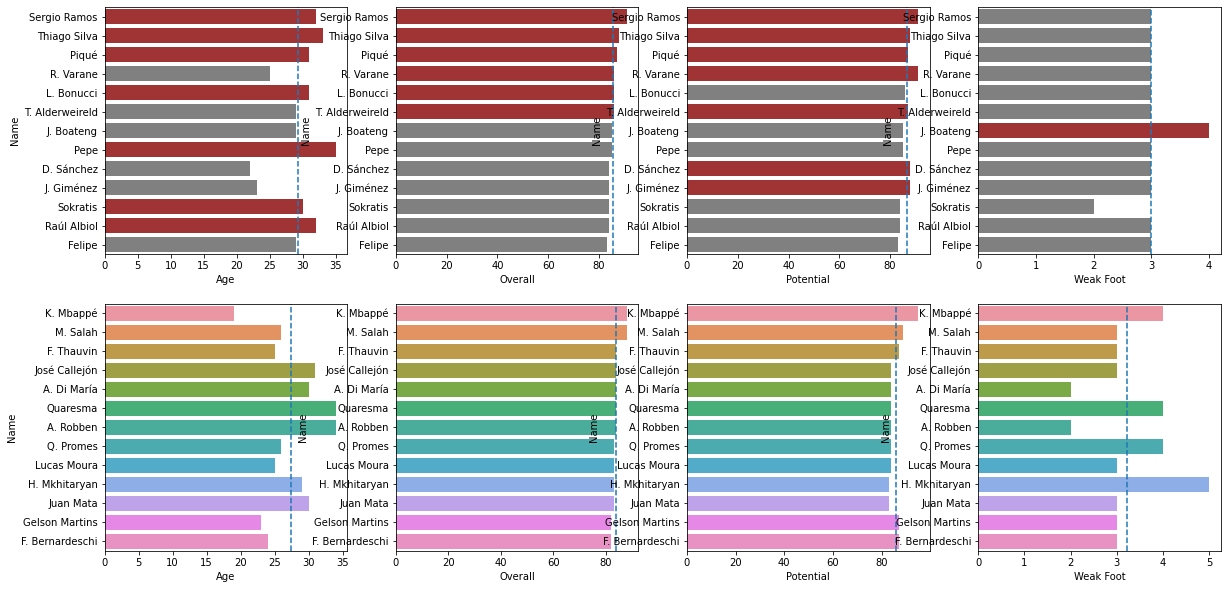

In [52]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(2, 4, figsize = (20, 10))

vs_list = ['Age', 'Overall', 'Potential', 'Weak Foot']

for i in range(8):
    
    if i < 4:
        colors = ['firebrick' if x > market[market['Position'] == 'RCB'][:13][vs_list[i]].mean()
                 else 'gray' for x in market[market['Position'] == 'RCB'][:13][vs_list[i]]]
        sns.barplot(x = vs_list[i], y = 'Name', data = market[market['Position'] == 'RCB'][:13],
                   palette = colors, ax = ax[i//4, i%4])
        ax[i//4, i%4].axvline(market[market['Position'] == 'RCB'][:13][vs_list[i]].mean(), ls = '--')
    else:
        sns.barplot(x = vs_list[i%4], y = 'Name', data = market[market['Position'] == 'RM'][:13],
                   ax = ax[i//4, i%4])
        ax[i//4, i%4].axvline(market[market['Position'] == 'RM'][:13][vs_list[i%4]].mean(), ls = '--')

- RCB포지션에는 Sergio Ramos를, RM포지션에는 K.Mbappe를 선발